# Importing Libraries and dataset

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community
import matplotlib.cm as cm
import seaborn as sns
from package import utilities as ut


C:\Users\Enrico\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Enrico\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Enrico\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
G = nx.read_edgelist('data/facebook_combined.txt', create_using=nx.Graph(),nodetype= int)


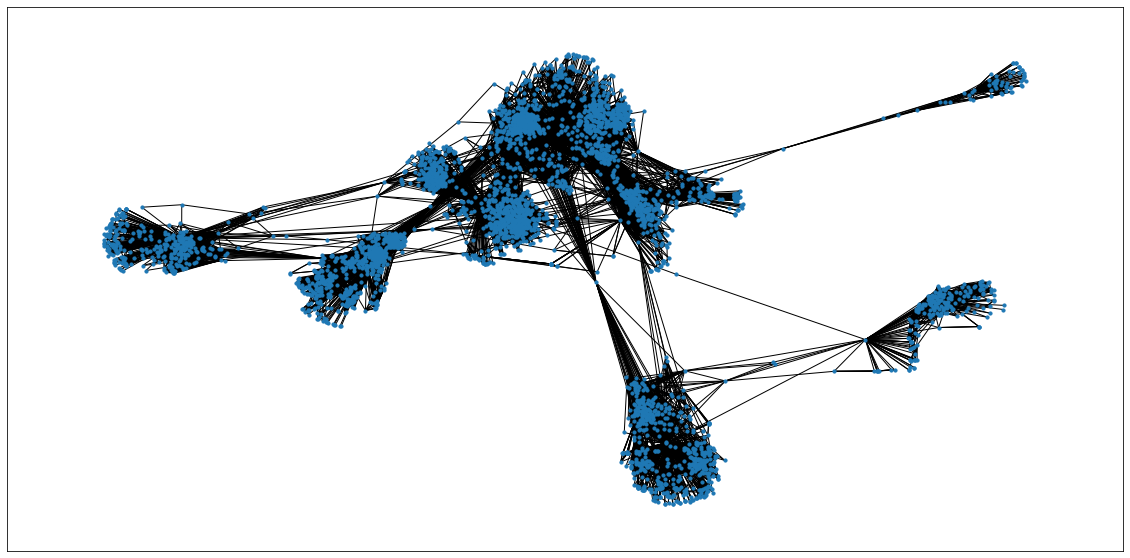

In [3]:
pos = nx.spring_layout(G)
plt.figure(figsize=(20,10))
nx.draw_networkx(G, pos= pos,with_labels= False,node_size=10)

# What is the overall structure of the network? ScaleFree


## Network Statisitcs
- Number of nodes and edges?
- Is it connected? Uncconnected mean that An edge traversal starting from a given vertex cannot reach any other vertex.
- Bipartite? The vertices can be partitioned in two independent sets.
- Average degree: The degree of a vertex of a graph specifies the number of edges incident to it

In [4]:
#prit information about grapg
info = nx.info(G)
print(info)
# True if the graph is connected, false otherwise.
connceted = nx.is_connected(G)
print("Network is connected?",connceted)
# Returns True if graph G is bipartite, False if not.
bipartite = nx.is_bipartite(G)
print("Network is bipartite?",bipartite)

Graph with 4039 nodes and 88234 edges
Network is connected? True
Network is bipartite? False


- Average Distance? The distance between two vertices represent the shortest path between them.
- What is the diameter?  The diameter of graph is the maximum distance between the pair of vertices.
- Density
- ?? Average degree: Average degree is simply the average number of edges per node in the graph.
- )) Betweeness: 

In [5]:
#calculate avg distance and print
avg_distance = nx.average_shortest_path_length(G)
print("Network Average distance: ", avg_distance)
#calculate diameter and print
diameter = nx.diameter(G, e=None, usebounds=False)
print("Network Diameter: ", diameter)

#avg_degree = sum(dict(G.degree()).values()) / nx.number_of_nodes(G) 
#betweennes = nx.betweenness_centrality(G)

Network Average distance:  3.6925068496963913
Network Diameter:  8


In [6]:
centrality = nx.degree_centrality(G)
print(" ")
print("----------Degree centrality----------")
print(" ")
for w in sorted(centrality, key=centrality.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality[w])

centrality_page_rank = nx.pagerank(G)
print(" ")
print("----------PageRank centrality----------")
print(" ")
for w in sorted(centrality_page_rank, key=centrality_page_rank.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality_page_rank[w])

 
----------Degree centrality----------
 
Most influent node:  107  Degree of:  0.258791480931154
Most influent node:  1684  Degree of:  0.1961367013372957
Most influent node:  1912  Degree of:  0.18697374938088163
Most influent node:  3437  Degree of:  0.13546310054482416
Most influent node:  0  Degree of:  0.08593363051015354
Most influent node:  2543  Degree of:  0.07280832095096582
Most influent node:  2347  Degree of:  0.07206537890044576
Most influent node:  1888  Degree of:  0.0629024269440317
Most influent node:  1800  Degree of:  0.06067360079247152
Most influent node:  1663  Degree of:  0.058197127290737984
 
----------PageRank centrality----------
 
Most influent node:  3437  Degree of:  0.0076145868447496
Most influent node:  107  Degree of:  0.006936420955866117
Most influent node:  1684  Degree of:  0.006367162138306824
Most influent node:  0  Degree of:  0.006289602618466542
Most influent node:  1912  Degree of:  0.003876971600884498
Most influent node:  348  Degree of: 

In [7]:
centrality_page_rank = nx.pagerank(G)
print("PageRank centrality")
for w in sorted(centrality_page_rank, key=centrality_page_rank.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality_page_rank[w])

PageRank centrality
Most influent node:  3437  Degree of:  0.0076145868447496
Most influent node:  107  Degree of:  0.006936420955866117
Most influent node:  1684  Degree of:  0.006367162138306824
Most influent node:  0  Degree of:  0.006289602618466542
Most influent node:  1912  Degree of:  0.003876971600884498
Most influent node:  348  Degree of:  0.002348096972780577
Most influent node:  686  Degree of:  0.002219359259800019
Most influent node:  3980  Degree of:  0.0021703235790099928
Most influent node:  414  Degree of:  0.001800299047070226
Most influent node:  698  Degree of:  0.0013171153138368812


## Network analysis


- Small World phenomenon claims that real networks although are large they have short diameter. This applies for real and virtual social networks (the Milgram experiment).
- Scale Free networks with power-law degree distribution have a skewed population with a few highly-connected nodes (such as social-influences) and a lot of loosely-connected nodes, this is a characteristic of social networks.
- We are going to compare a random graph with our Social Network graph





### Random Graph

- We expect a Degree Normal distubution
- Diamenter or distance?

In [8]:
#generate a random graph with 4039 nodes and a probability od 0.01 per edges
G_random = nx.gnp_random_graph(4039, 0.01, seed=42)
#print info about random graph
info_random = nx.info(G_random)
print(info_random)

Graph with 4039 nodes and 80990 edges


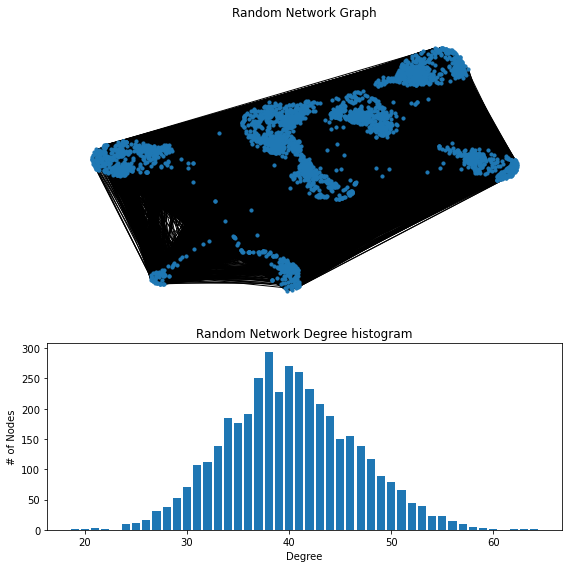

In [9]:
# Create a gridspec for adding subplots of different sizes
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
# Plot the random graph with spring layout before intializated
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(G)
nx.draw_networkx(G_random, pos= pos,with_labels= False, node_size=10)
#set title
ax0.set_title("Random Network Graph")
#do not plot axis on graph
ax0.set_axis_off()
#secondo plot for degree distribution
ax1 = fig.add_subplot(axgrid[3:, :])
#create a list with the degree of random graph and sort 
degree_sequence = sorted((d for n, d in G_random.degree()), reverse=True)
#Returns the sorted unique elements of an array with its number of times each unique value comes up in the input array
frequency_degree = np.unique(degree_sequence, return_counts=True)
ax1.bar(*frequency_degree)
ax1.set_title("Random Network Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")
fig.tight_layout()
plt.show()

# Real social network 

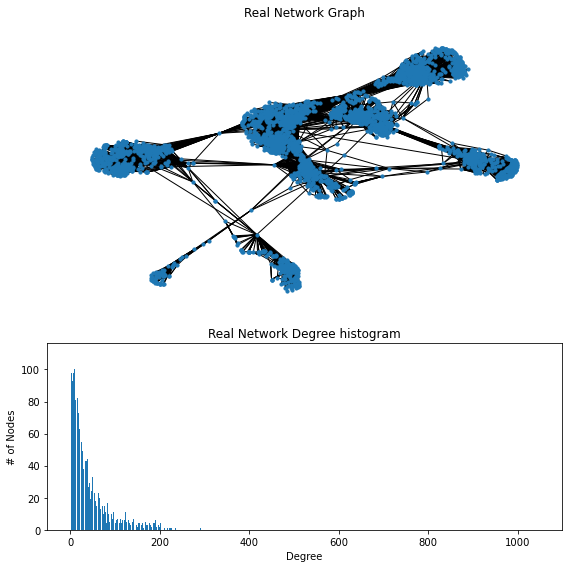

In [10]:
# Create a gridspec for adding subplots of different sizes
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
# Plot the random graph with spring layout before intializated
ax0 = fig.add_subplot(axgrid[0:3, :])
nx.draw_networkx(G, pos= pos,with_labels= False, node_size=10)
#set title
ax0.set_title("Real Network Graph")
#do not plot axis on graph
ax0.set_axis_off()
#secondo plot for degree distribution
ax1 = fig.add_subplot(axgrid[3:, :])
#create a list with the degree of random graph and sort 
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
#Returns the sorted unique elements of an array with its number of times each unique value comes up in the input array
frequency_degree = np.unique(degree_sequence, return_counts=True)
ax1.bar(*frequency_degree)
ax1.set_title("Real Network Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")
fig.tight_layout()
plt.show()

# What are the subgroups and communities in the network?

Compute the partition of the graph nodes which maximises the modularity using the Louvain heuristices:

Alghoritm approach:

Step I:
- Initially, all nodes assigned to a different community.
- For each node i consider a neighbour j and evaluate gain in modularity of community if I moves to j’s community.
- Move node i to j’s community which has the largest positive gain.
- Do this for all nodes. Stop when no improvement can be achieved.


Step II:

- Construct a new network whose nodes are the communities identified during Step I.
- The weight of the link between two nodes is the sum of the weight of the links between the nodes in the corresponding communities. Links between nodes of the same community lead to weighted self-loops.
- Repeat Step I and Step II on this network.
- The passes are repeated until there are no more changes and maximum modularity is attained.


In [11]:
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
df_communities = pd.DataFrame(partition, index=[0]).T.reset_index()
df_communities.columns = ["nodes", "communities"]
print("How Many communities are there? ", len(set(values)))


How Many communities are there?  16


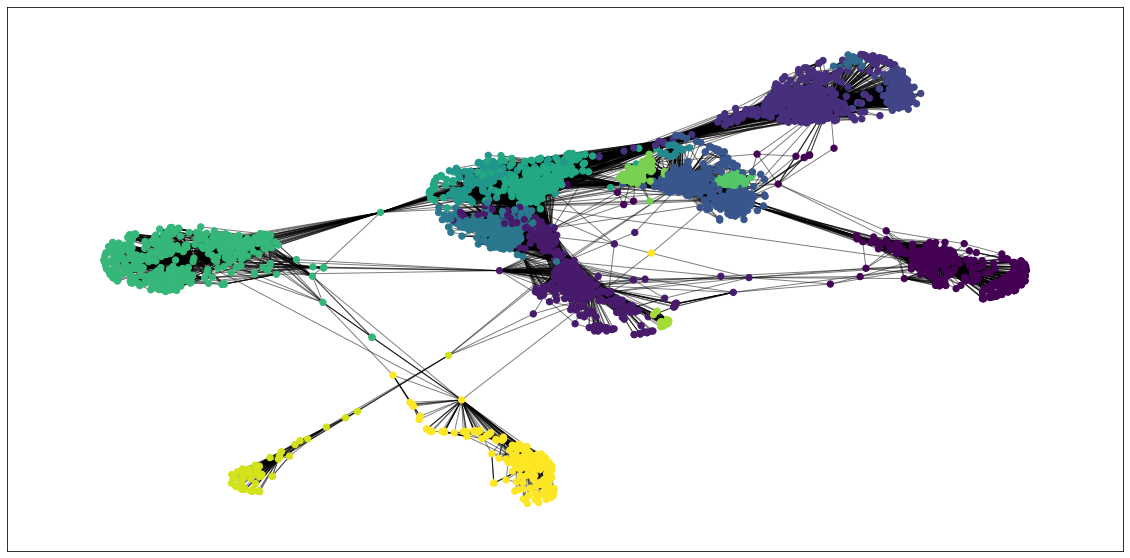

In [12]:
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [13]:
df_communities_statistics = df_communities.groupby("communities").count().sort_values("nodes", ascending=False).reset_index()
sorted_communities = list(df_communities_statistics.communities)
df_communities_statistics["communities"] = ["Community "+str(df_communities_statistics["communities"][x]) for x in range(len(df_communities_statistics))]
df_communities_statistics

communities  nodes
0   Community 10    548
1    Community 2    535
2    Community 9    444
3    Community 1    430
4    Community 4    423
5    Community 0    354
6    Community 6    325
7   Community 12    237
8    Community 3    226
9   Community 15    206
10   Community 8    115
11  Community 11     73
12  Community 14     60
13  Community 13     25
14   Community 5     19
15   Community 7     19

Text(0.5, 1.0, 'Number of nodes per communities')

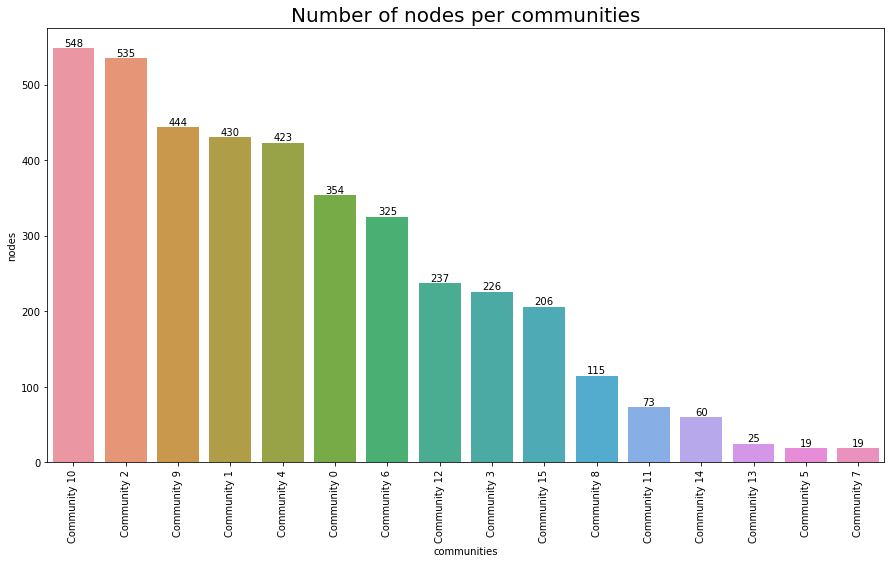

In [14]:
#define the plot
plt.figure(figsize=(15,8))

ax = sns.barplot(x="communities",y="nodes", data=df_communities_statistics)

#attach the value of each bar
ax.bar_label(ax.containers[0])

#rotate the label on X axis in order to allow to read each value
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

#set the title of the plot
ax.set_title("Number of nodes per communities", fontsize = 20)

# Communities analysis

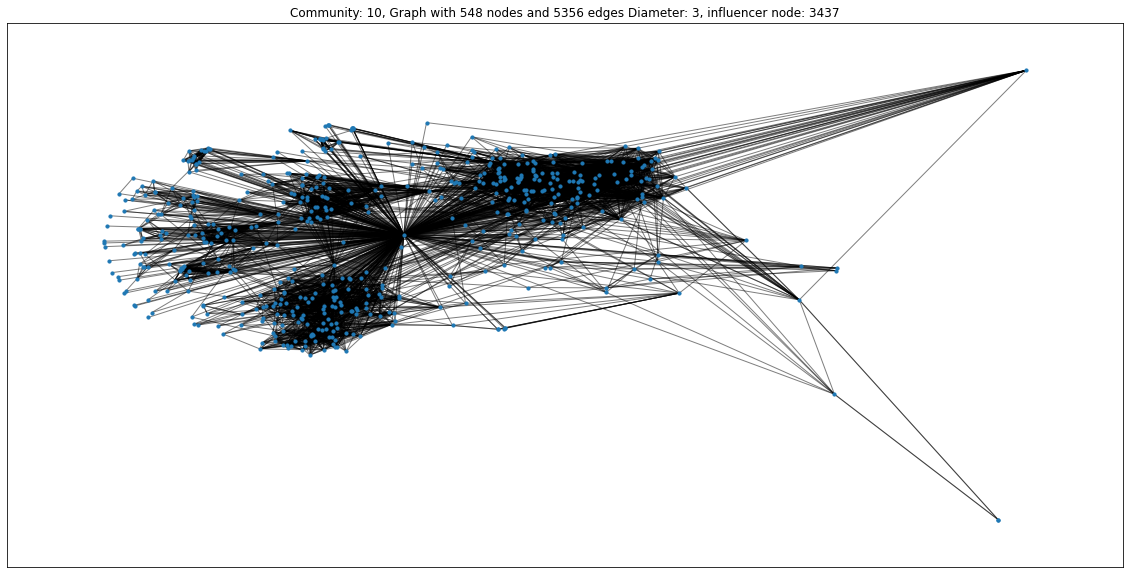

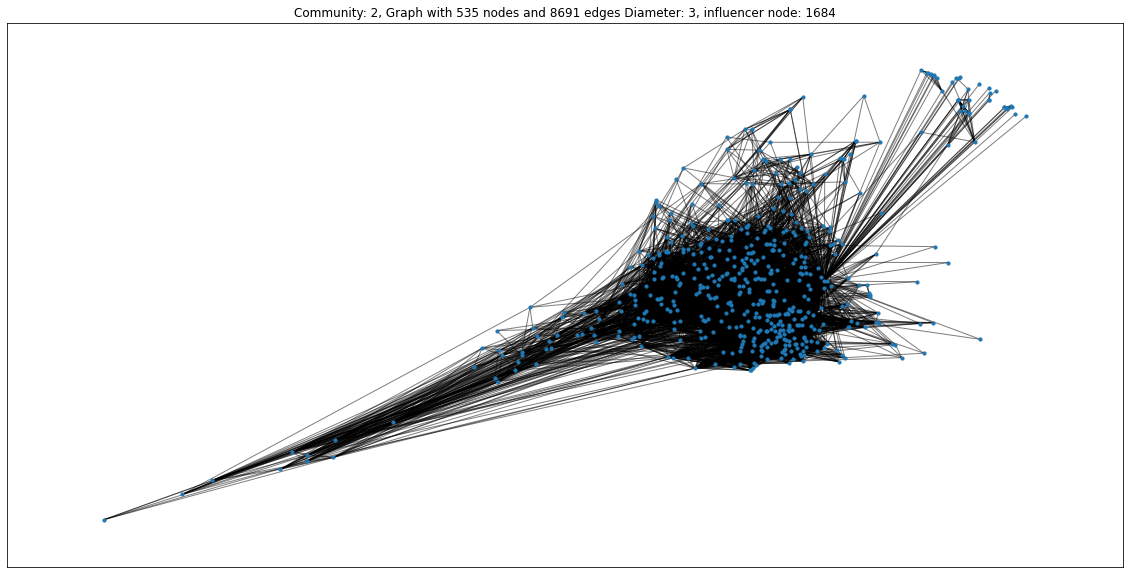

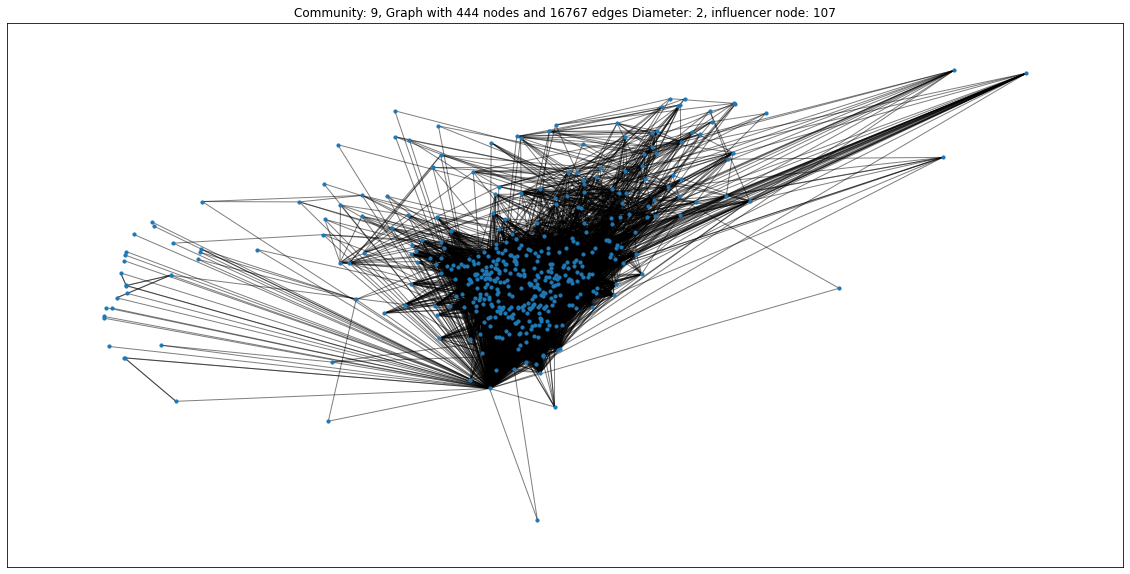

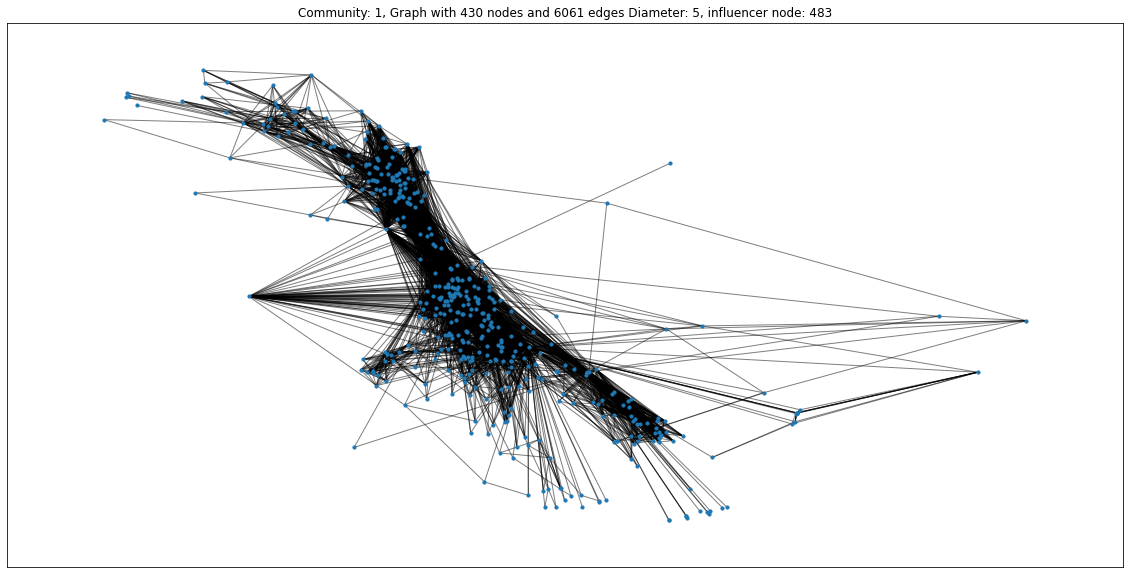

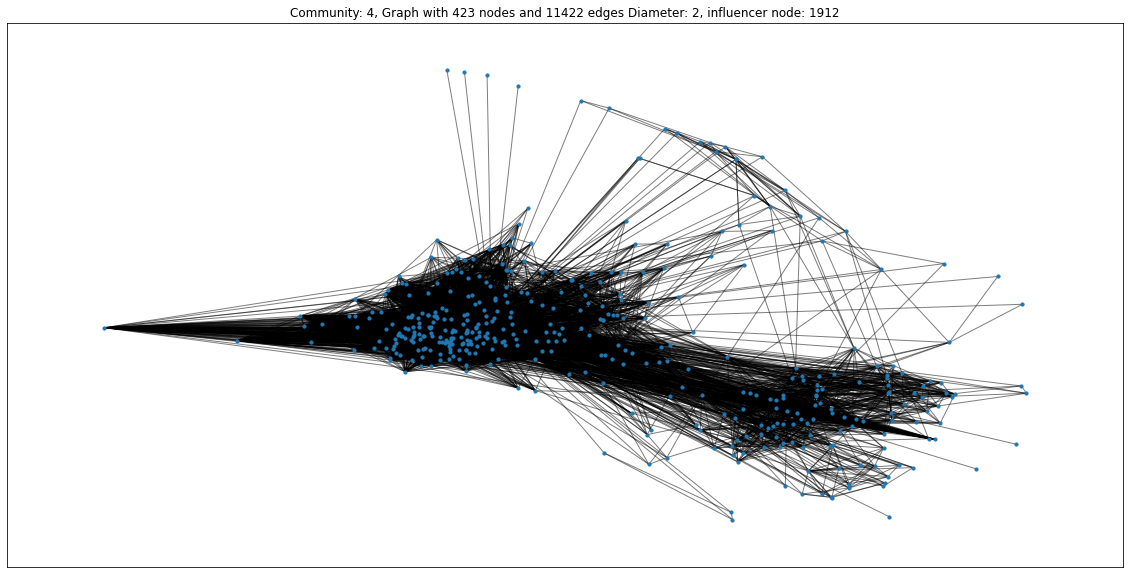

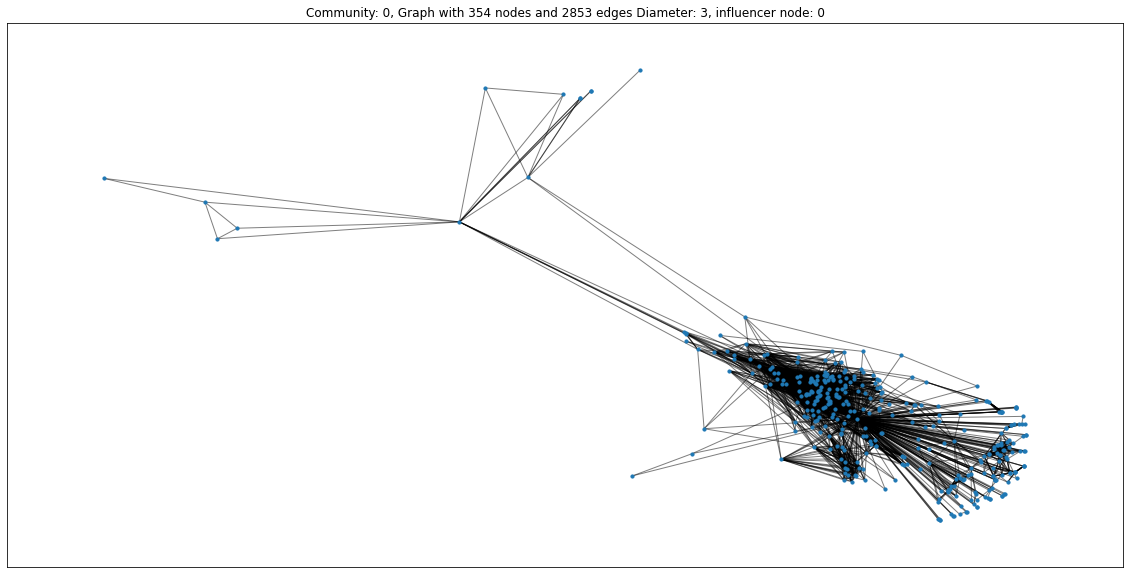

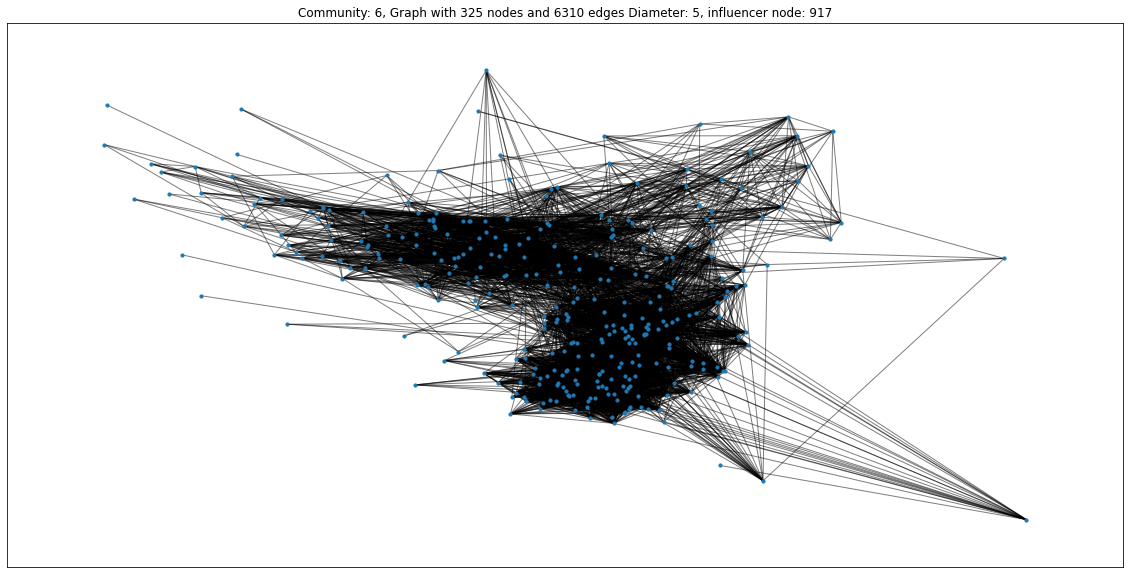

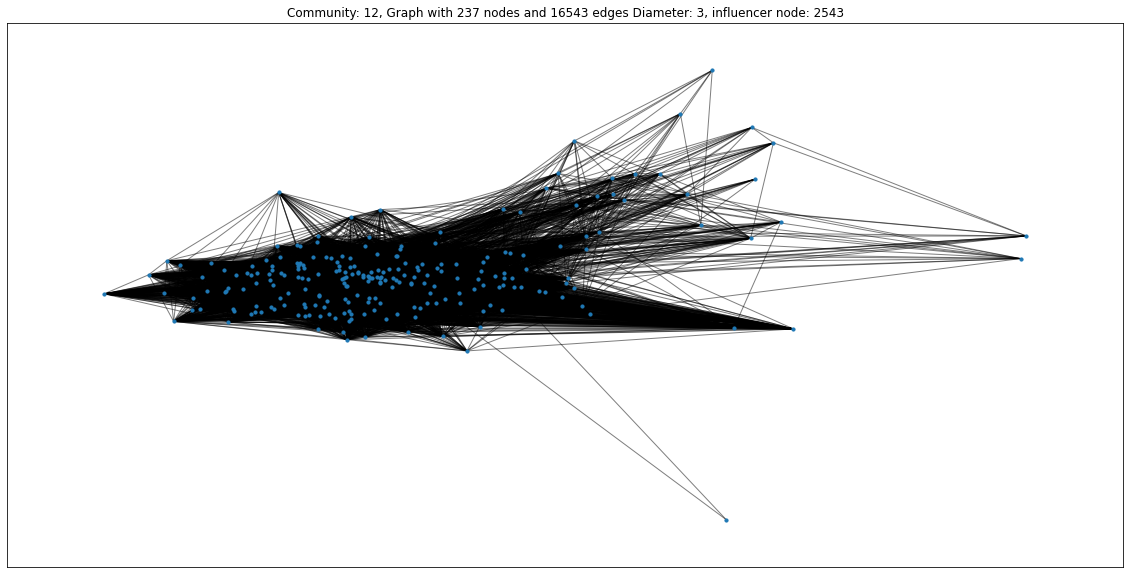

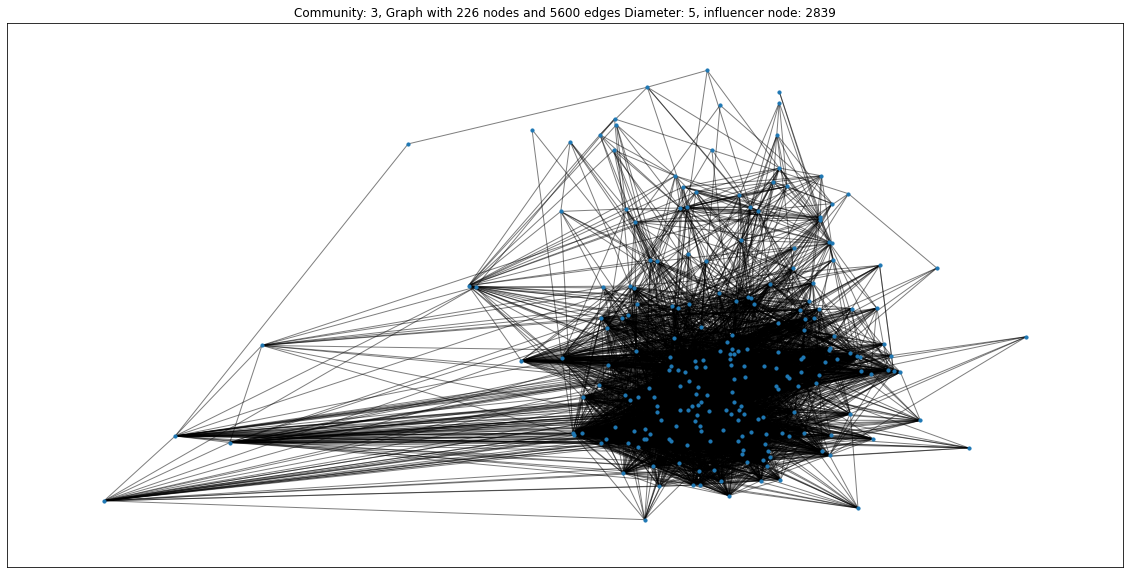

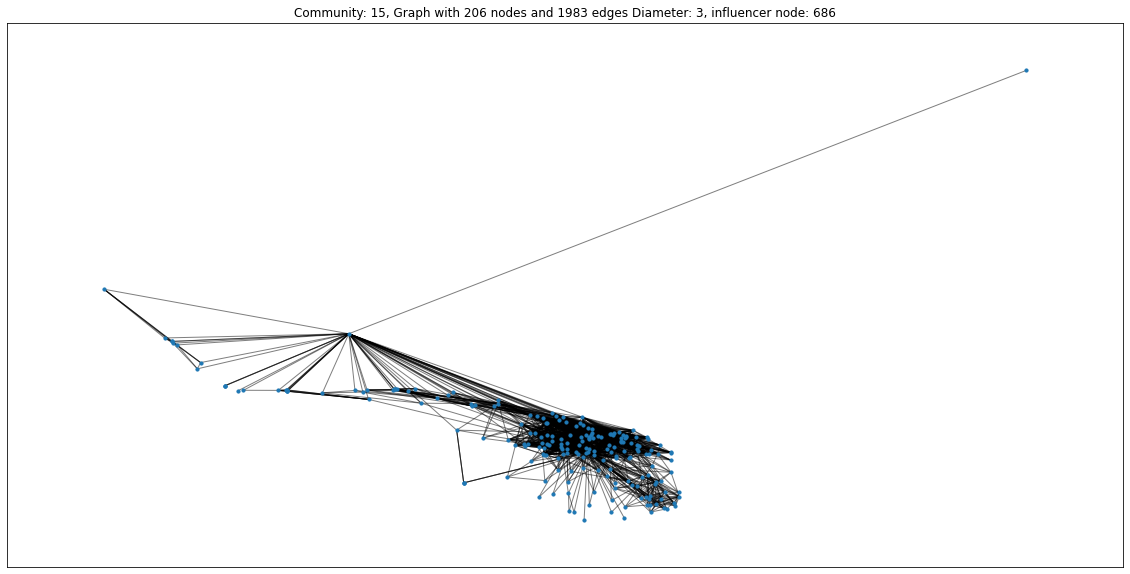

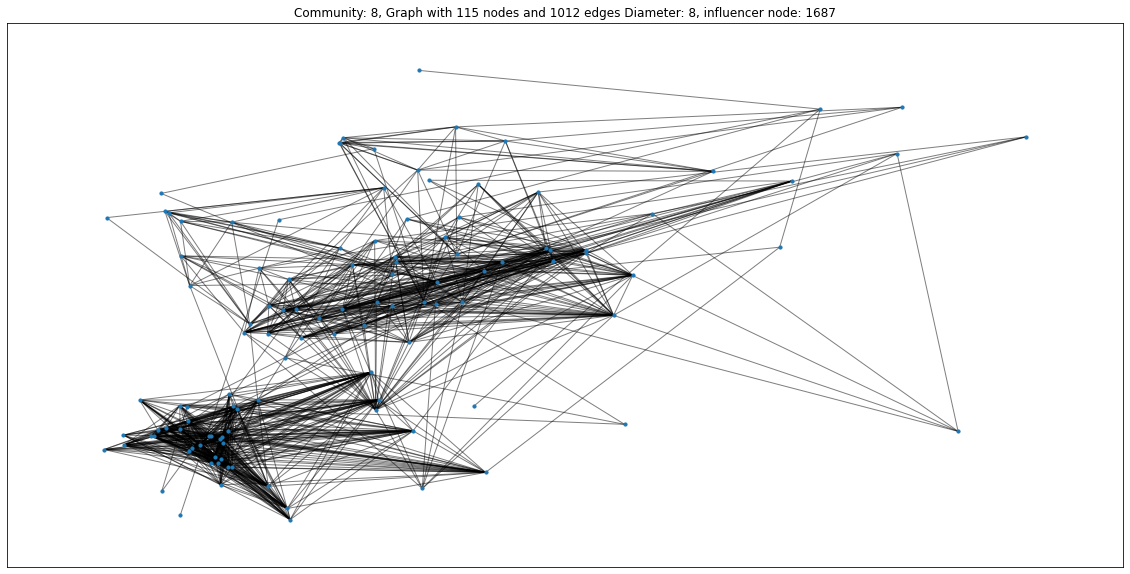

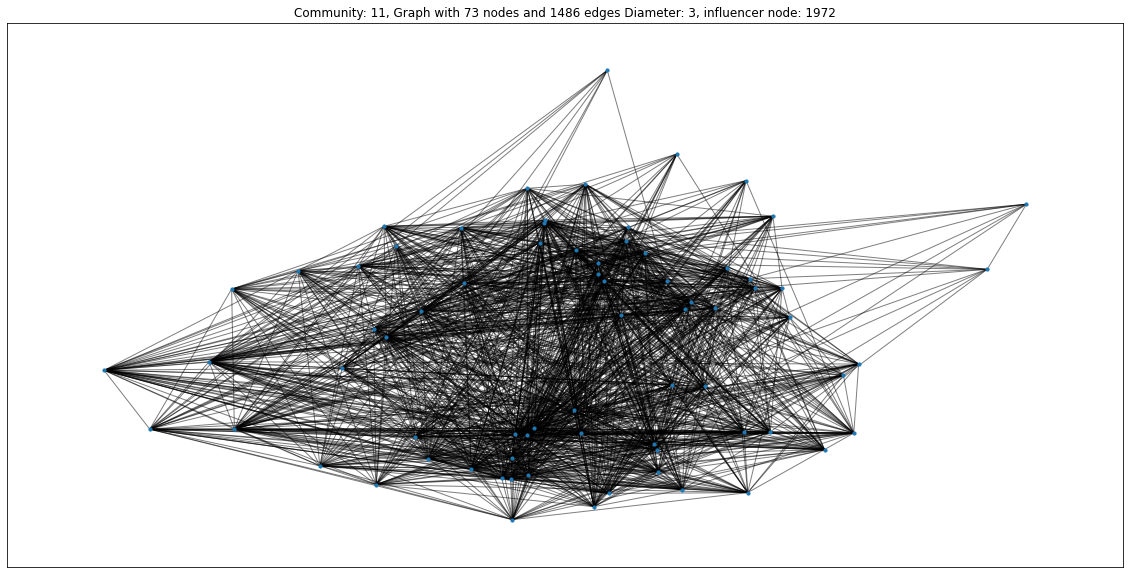

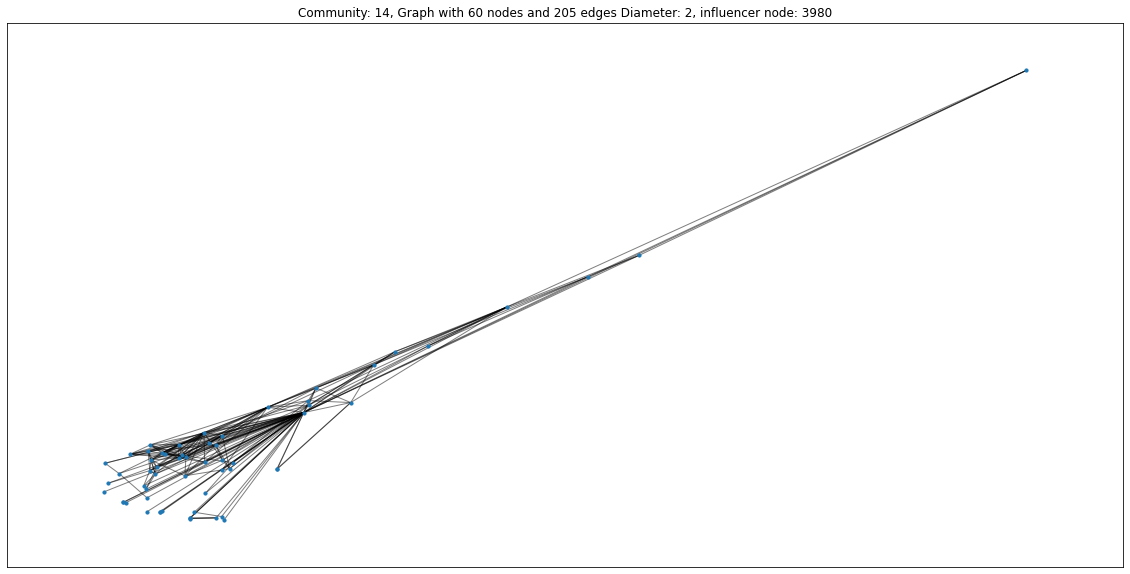

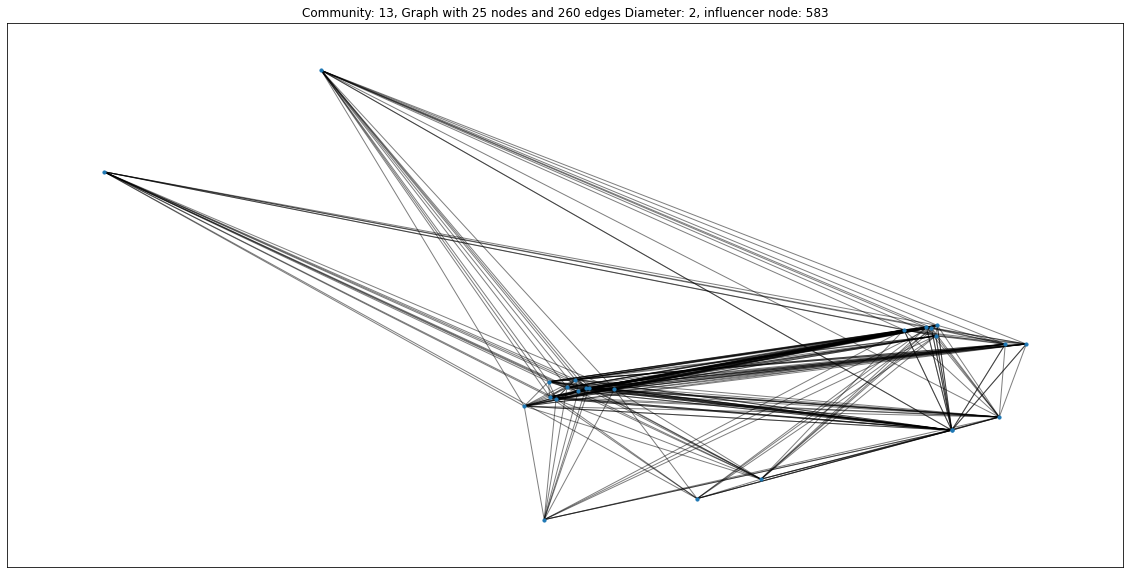

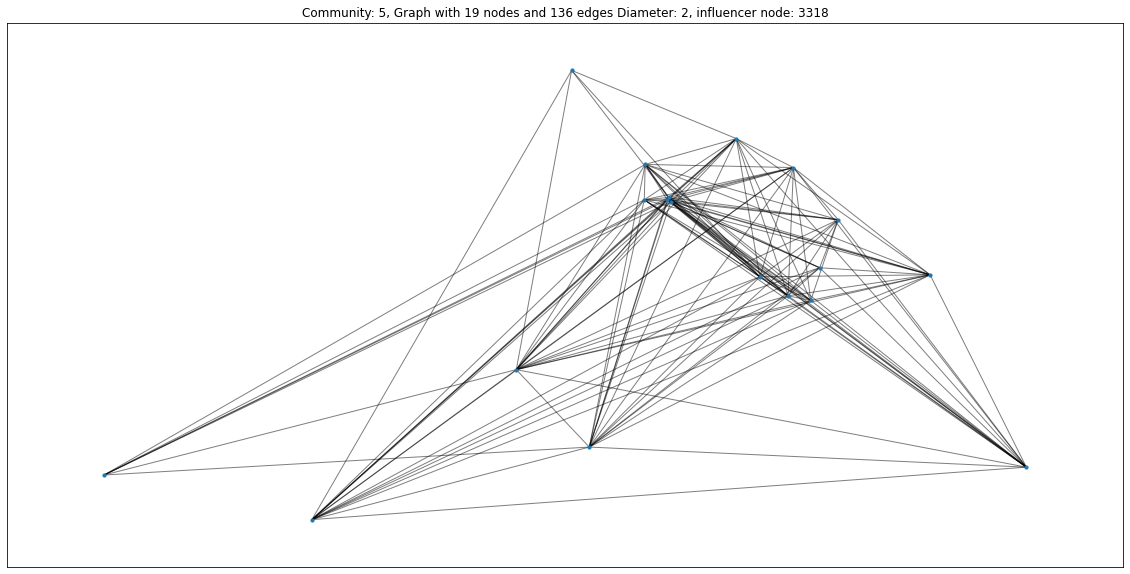

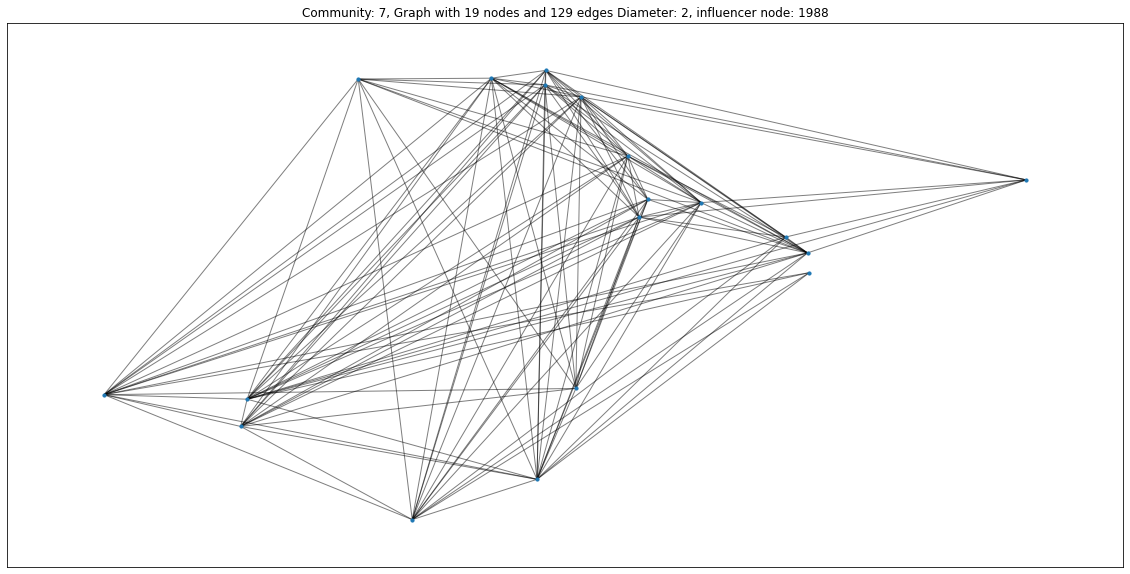

In [15]:
comm_info = []
comm_avg_distance = []
comm_diameter = []
comm_influencer = []
for x in sorted_communities:
    nodes = list(df_communities[df_communities["communities"]==x]["nodes"])
    community = G.subgraph(nodes)
    info = nx.info(community)
    comm_info += [info]
    avg_distance = nx.average_shortest_path_length(community)
    comm_avg_distance += [avg_distance]
    diameter = nx.diameter(community, e=None, usebounds=False)
    comm_diameter += [diameter]
    influencer = sorted(nx.degree_centrality(community), key=centrality.get, reverse=True)[0]
    comm_influencer += [influencer]
    plt.figure(figsize=(20,10))
    plt.title("Community: "+str(x)+", "+str(info) + " Diameter: " + str(diameter) + ", influencer node: " + str(influencer))
    nx.draw_networkx_nodes(community, pos, node_size=10)
    nx.draw_networkx_edges(community, pos, alpha=0.5)
    plt.show()

df_communities_statistics["comm_info"] = comm_info
df_communities_statistics["comm_avg_distance"] = comm_avg_distance
df_communities_statistics["comm_diameter"] = comm_diameter
df_communities_statistics["comm_influencer"] = comm_influencer


In [16]:
df_communities_statistics

communities  nodes                             comm_info  \
0   Community 10    548   Graph with 548 nodes and 5356 edges   
1    Community 2    535   Graph with 535 nodes and 8691 edges   
2    Community 9    444  Graph with 444 nodes and 16767 edges   
3    Community 1    430   Graph with 430 nodes and 6061 edges   
4    Community 4    423  Graph with 423 nodes and 11422 edges   
5    Community 0    354   Graph with 354 nodes and 2853 edges   
6    Community 6    325   Graph with 325 nodes and 6310 edges   
7   Community 12    237  Graph with 237 nodes and 16543 edges   
8    Community 3    226   Graph with 226 nodes and 5600 edges   
9   Community 15    206   Graph with 206 nodes and 1983 edges   
10   Community 8    115   Graph with 115 nodes and 1012 edges   
11  Community 11     73    Graph with 73 nodes and 1486 edges   
12  Community 14     60     Graph with 60 nodes and 205 edges   
13  Community 13     25     Graph with 25 nodes and 260 edges   
14   Community 5     19     Graph with 19 nodes and 136 edges   
15   Community 7     19     Graph with 19 nodes and 129 edges   

    comm_avg_distance  comm_diameter  comm_influencer  
0            1.971243              3             3437  
1            1.942518              3             1684  
2            1.829510              2              107  
3            2.446251              5              483  
4            1.872027              2             1912  
5            2.013412              3                0  
6            2.298993              5              917  
7            1.413073              3             2543  
8            1.928968              5             2839  
9            2.129718              3              686  
10           2.965675              8             1687  
11           1.435693              3             1972  
12           1.884181              2             3980  
13           1.133333              2              583  
14           1.204678              2             3318  
15           1.245614              2             1988

# Virality in communities

In [17]:
nodes = list(df_communities[df_communities["communities"]==13]["nodes"])


In [18]:
df = pd.read_csv('data/facebook_combined.txt', sep=" ", header=None)
df.columns = ["node1", "node2"]
df = pd.read_csv('data/facebook_combined.txt', sep=" ", header=None)
df.columns = ["node1", "node2"]
centrality = nx.degree_centrality(G)
centrality = pd.DataFrame(centrality, index=[0]).T.reset_index()
centrality.columns = ["node1","centrality"]
df_centrality = pd.merge(df, centrality, on="node1")
df_centrality.columns = ["node1","node2","node1_centrality"]
centrality.columns = ["node2","centrality"]
df_centrality = pd.merge(df_centrality, centrality, on="node2")
df_centrality.columns = ["node1","node2","node1_centrality","node2_centrality"]
df_centrality["weight"] = ((df_centrality["node1_centrality"]+df_centrality["node2_centrality"])/2)*10000
df_centrality = df_centrality.drop(columns=["node1_centrality","node2_centrality"])
df_centrality = df_centrality[df_centrality["node1"].isin(nodes)].reset_index(drop=True)
df_centrality.sort_values("weight", ascending=False)

node1  node2     weight
20     583    600  60.673601
79     583    643  60.673601
116    583    658  60.673601
27     583    615  60.673601
6      578    583  60.673601
..     ...    ...        ...
248    628    681  43.338286
41     599    628  43.338286
52     628    632  42.100050
95     628    647  38.385339
188    628    665  37.147103

[260 rows x 3 columns]

In [19]:
G_inf = nx.from_pandas_edgelist(
    df_centrality,
    source="node1",
    target="node2",
    edge_attr="weight",
    create_using=nx.Graph())

In [20]:
nx.info(G_inf)

'Graph with 25 nodes and 260 edges'

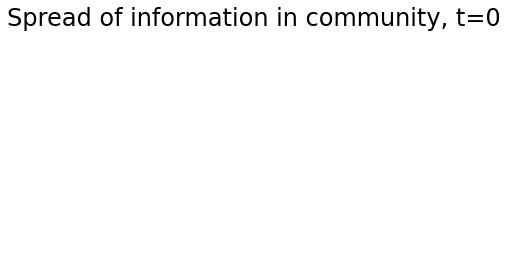

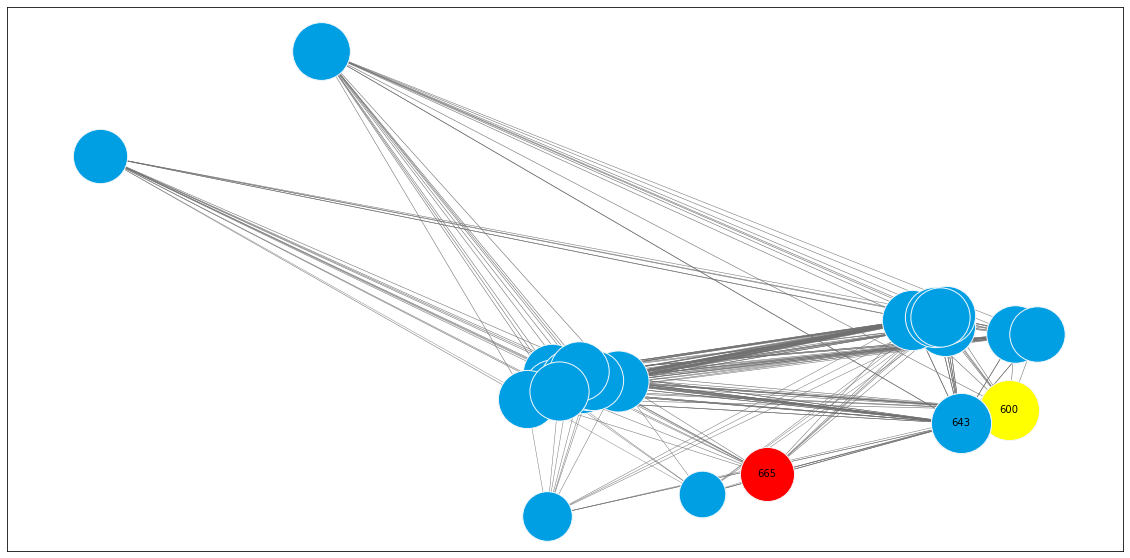

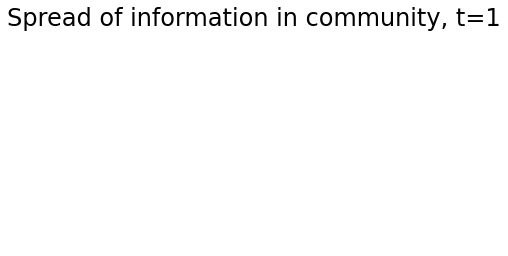

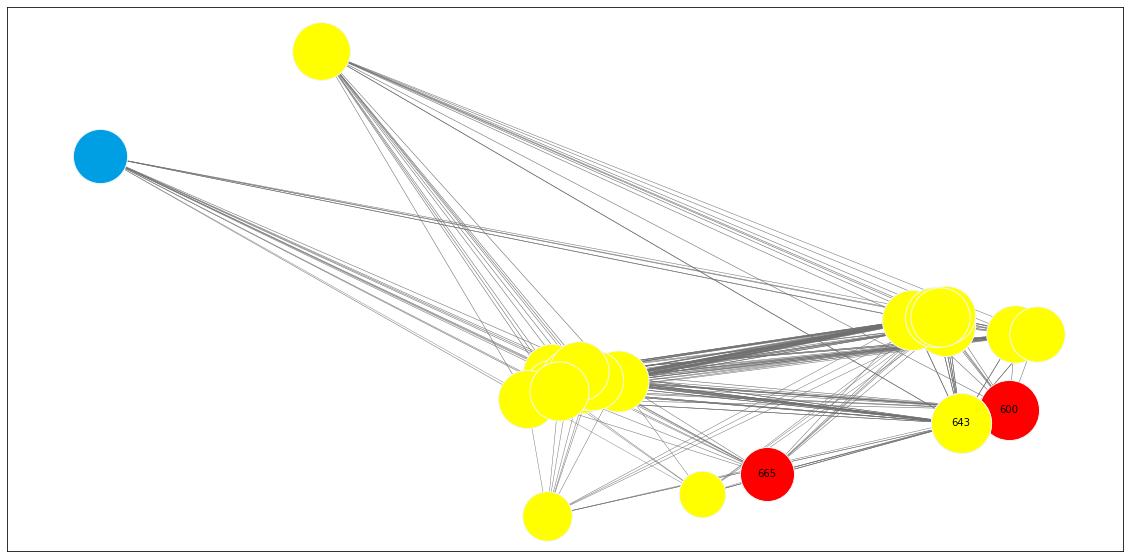

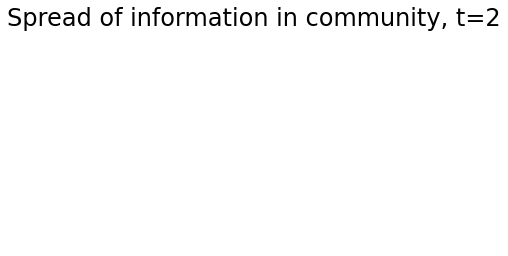

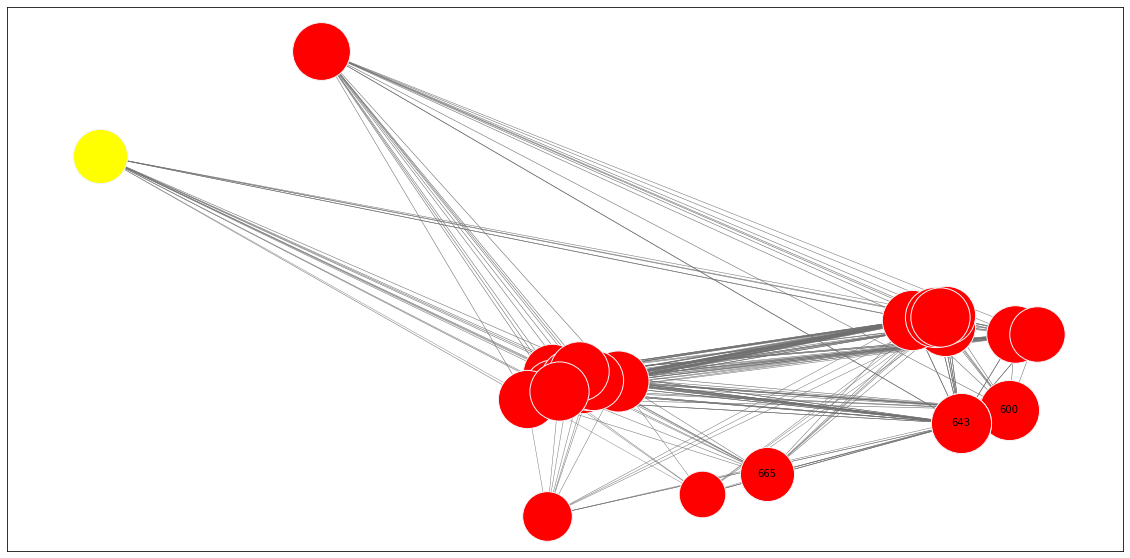

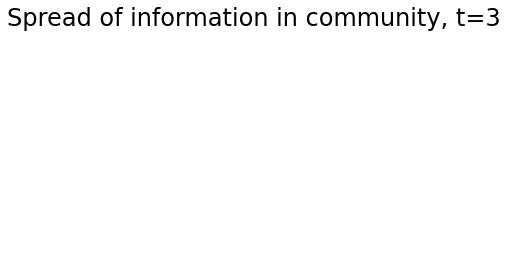

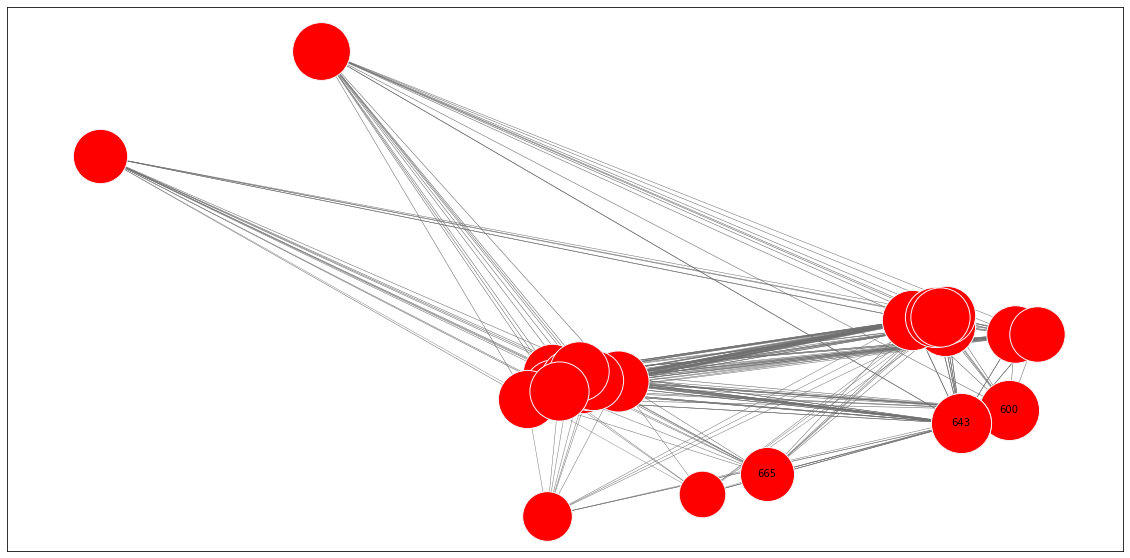

In [28]:
infection_times = {665:-1,643:-1,600:0}
label = {665:"665",643:"643",600:"600"}

for t in range(4):
    ut.plot_G(G_inf,pos,infection_times,t, label)
    ut.infection_times = ut.independent_cascade(G_inf,t,infection_times)

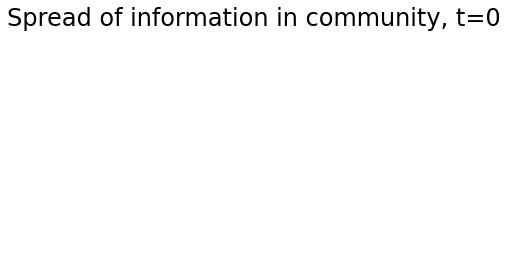

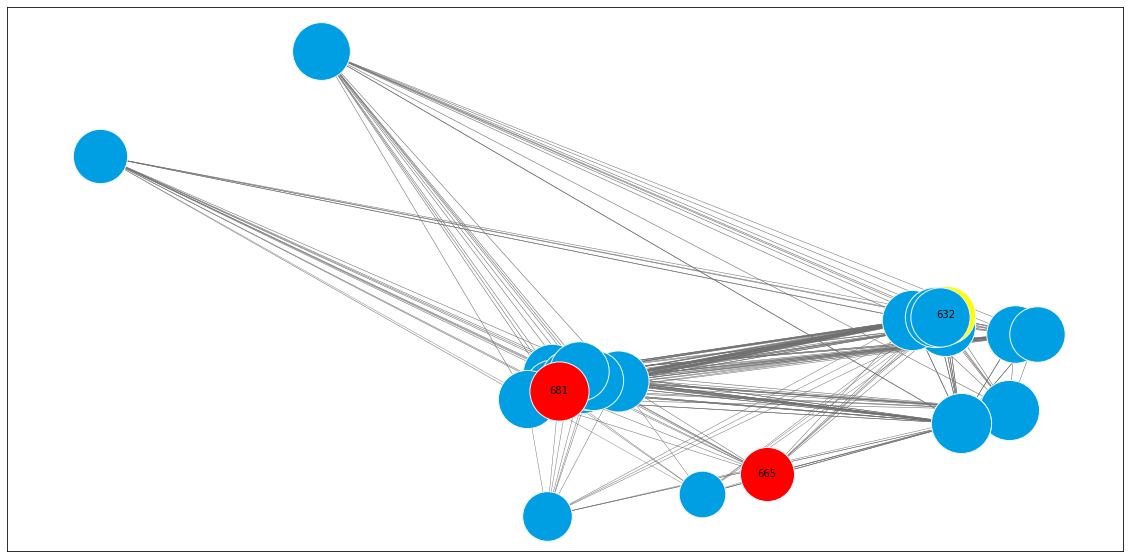

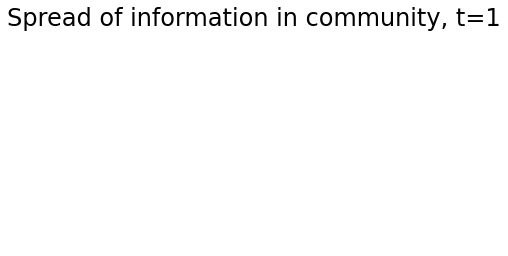

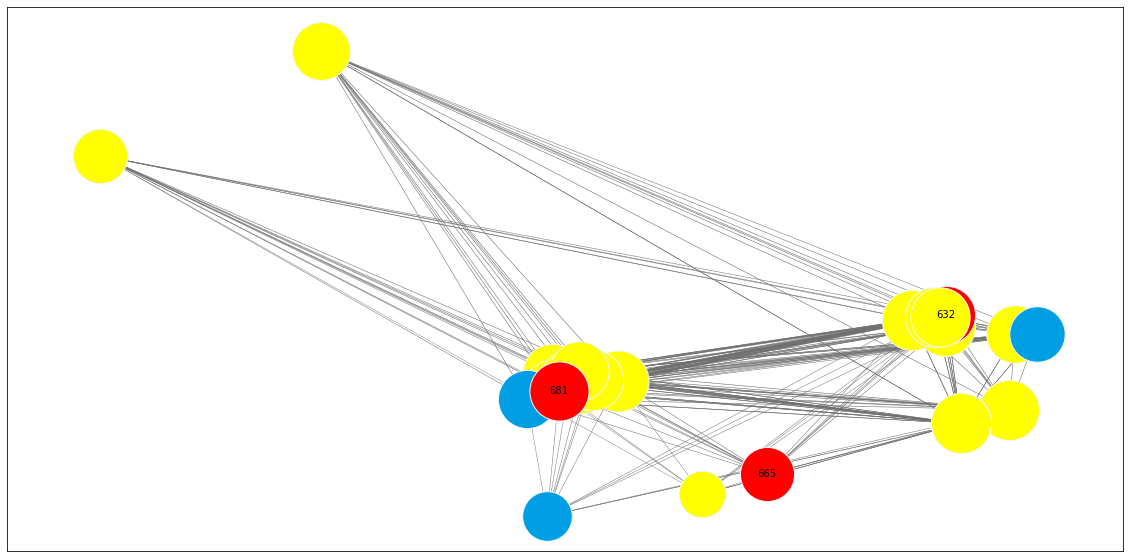

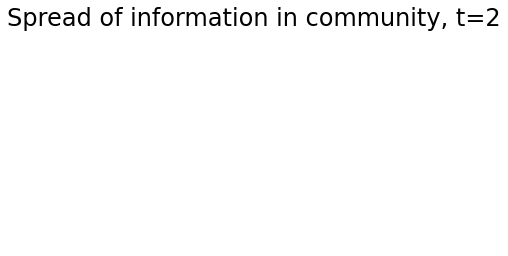

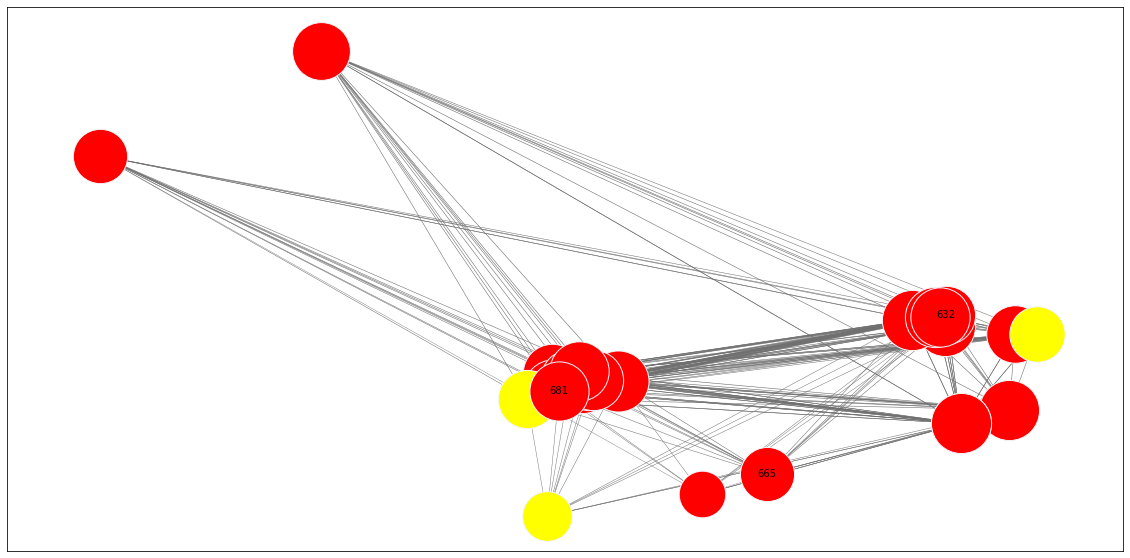

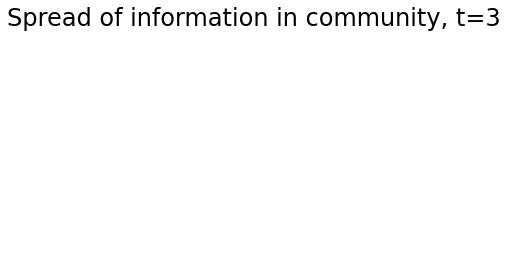

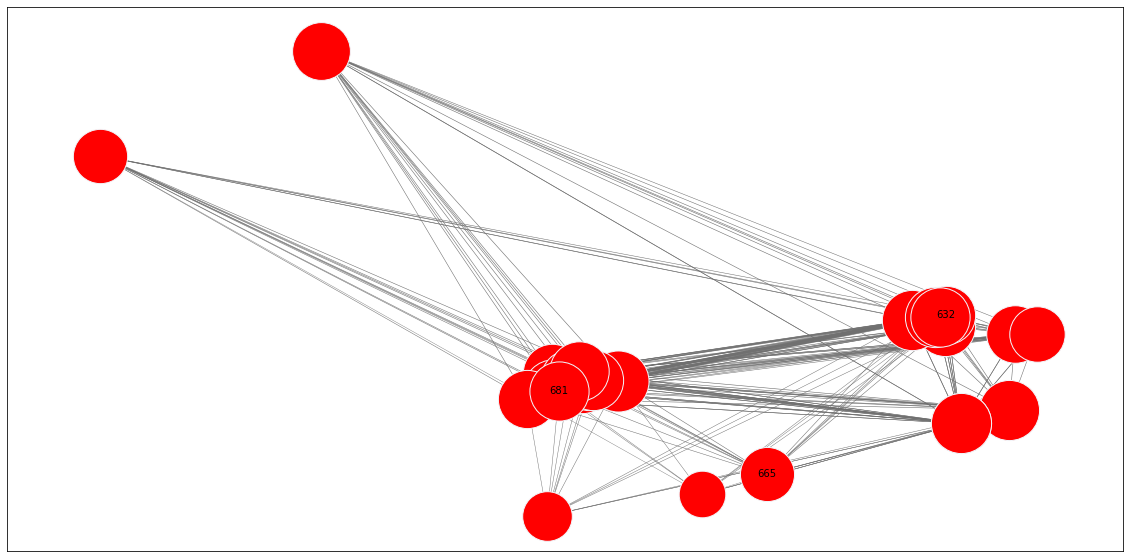

In [30]:
weighted_degrees = dict(nx.degree(G_inf,weight='weight'))
infection_times = {665:-1,681:-1,632:0}
label = {665:"665",681:"681",632:"632"}

for t in range(4):
    ut.plot_G(G_inf,pos,infection_times,t, label)
    ut.infection_times = ut.independent_cascade(G_inf,t,infection_times)